In [1]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
from sklearn import preprocessing
from bioinfokit.visuz import cluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import seaborn as sns


In [2]:
data = pd.read_csv("ElectricCarData_Norm.csv")
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


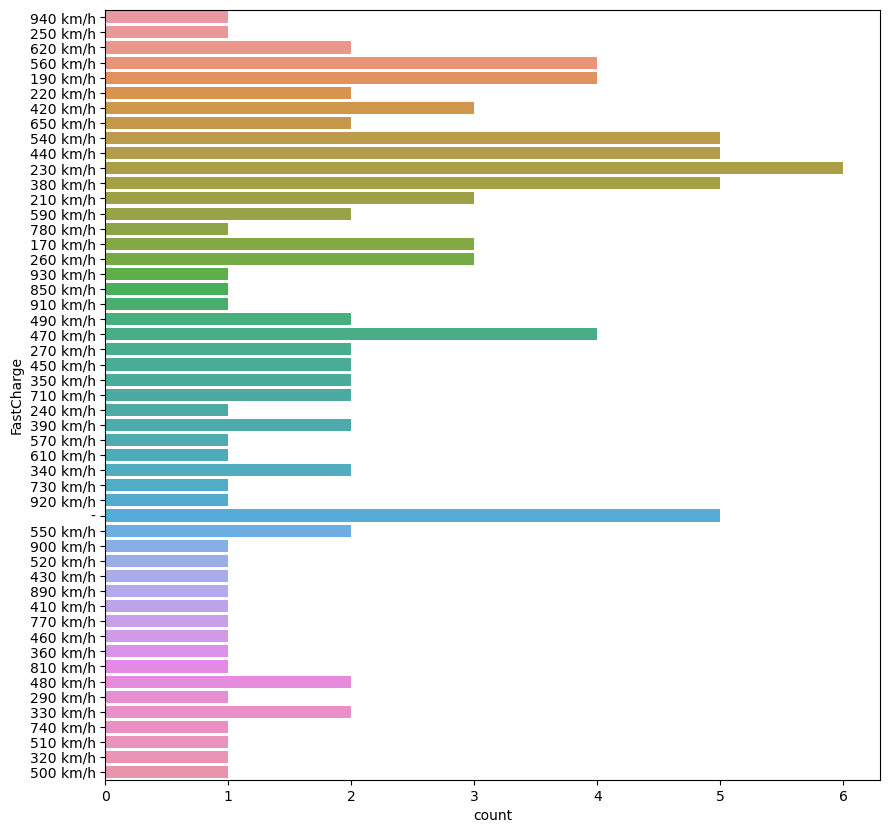

In [3]:
plt.figure(figsize=(10,10))
sns.countplot(y='FastCharge',data=data)
plt.show()

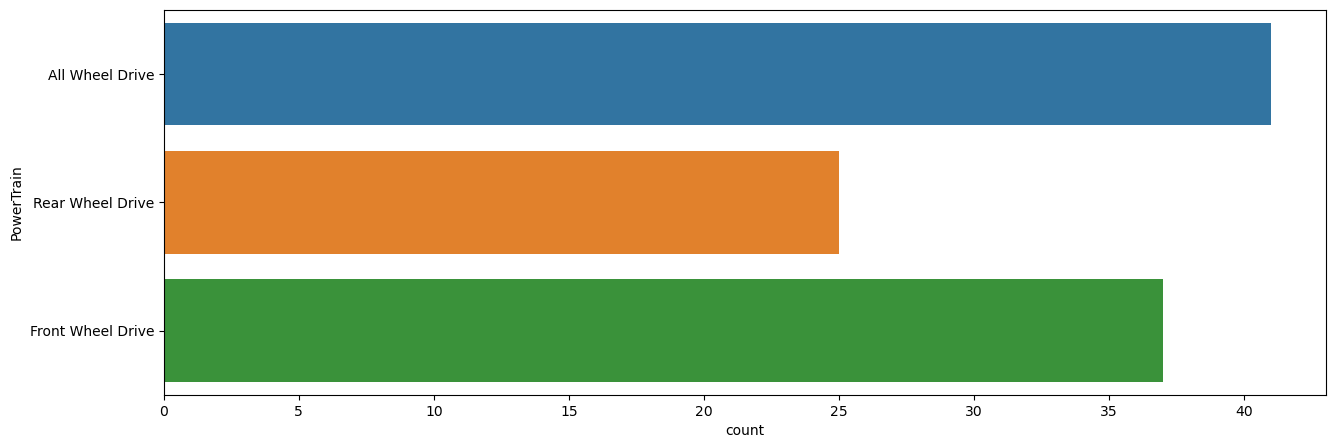

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(y='PowerTrain',data=data)
plt.show()

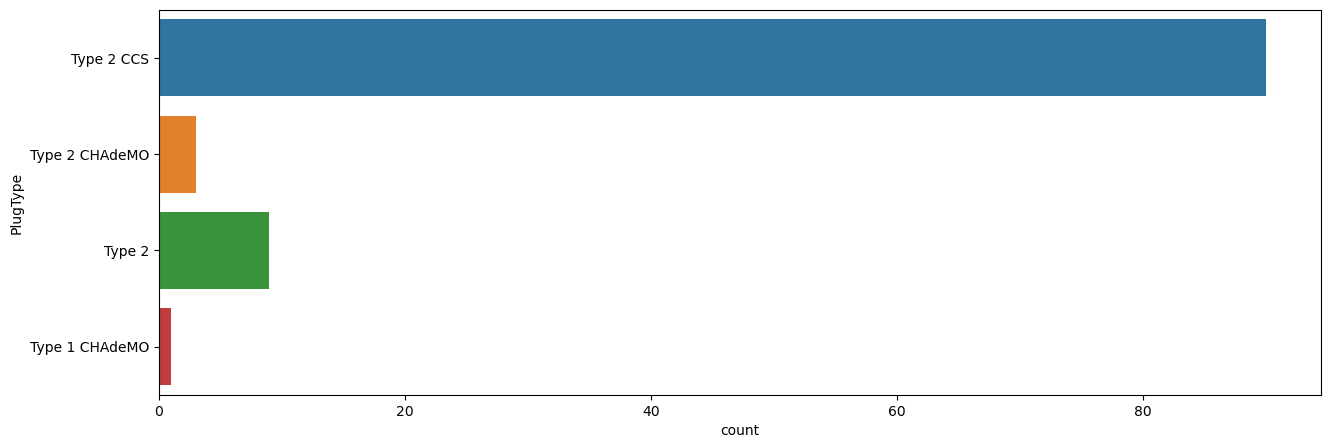

In [5]:
plt.figure(figsize=(15,5))
sns.countplot(y='PlugType',data=data)
plt.show()

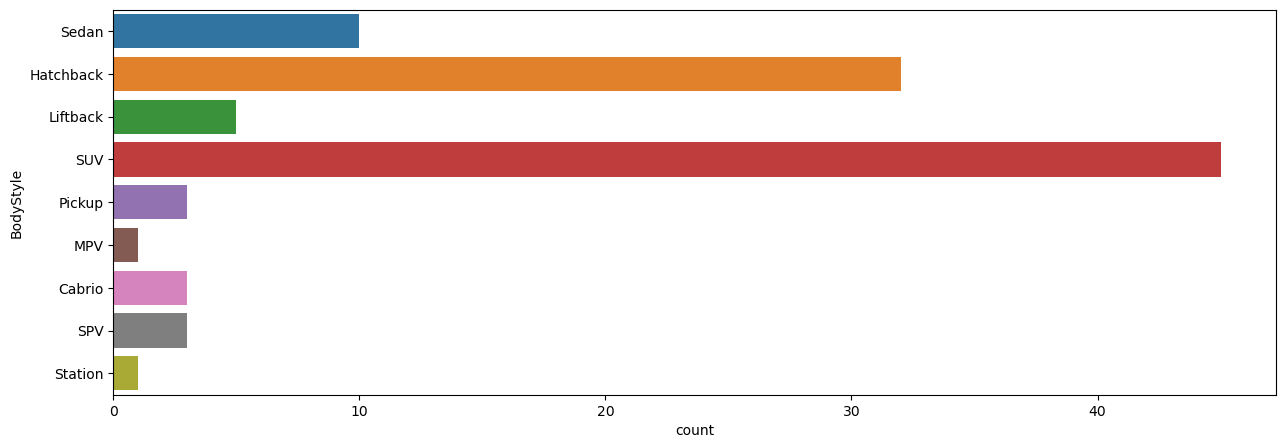

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(y='BodyStyle',data=data)
plt.show()

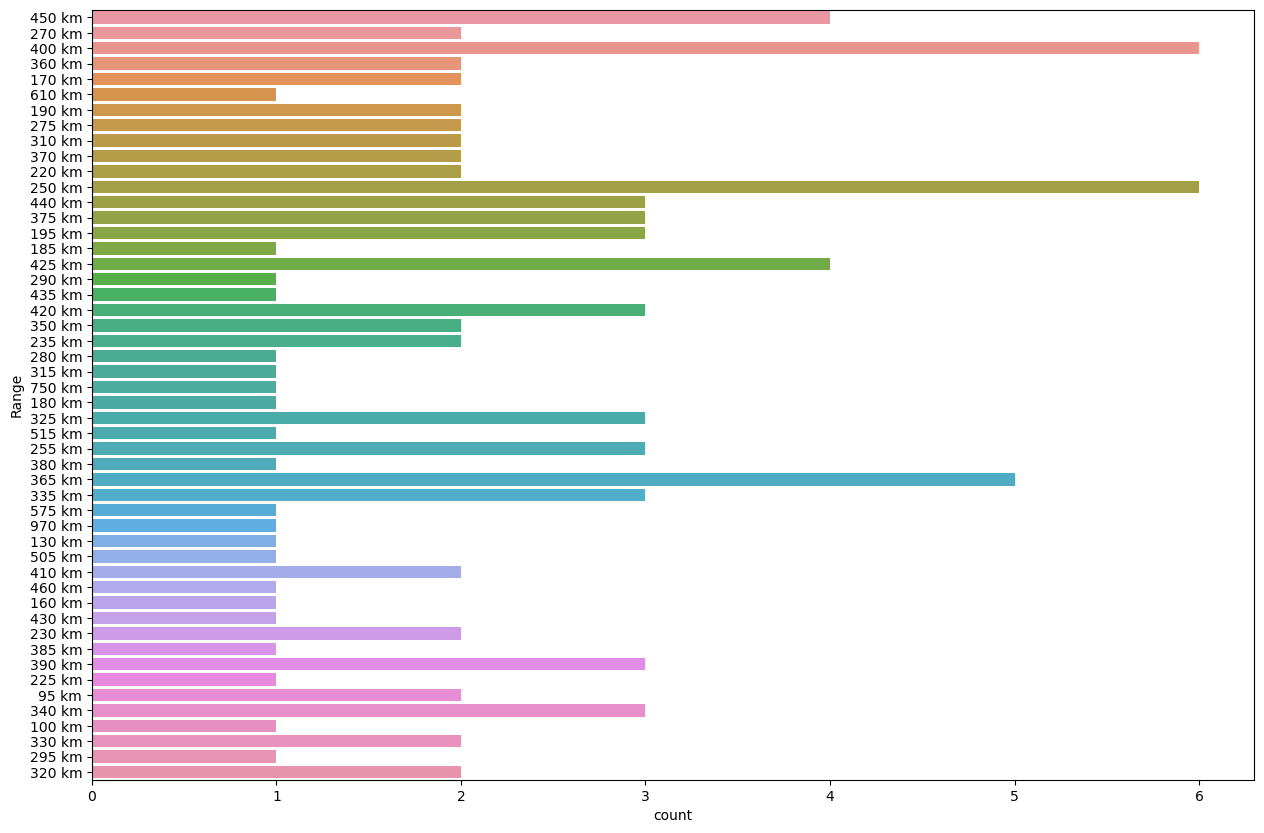

In [7]:
plt.figure(figsize=(15,10))
sns.countplot(y='Range',data=data)
plt.show()

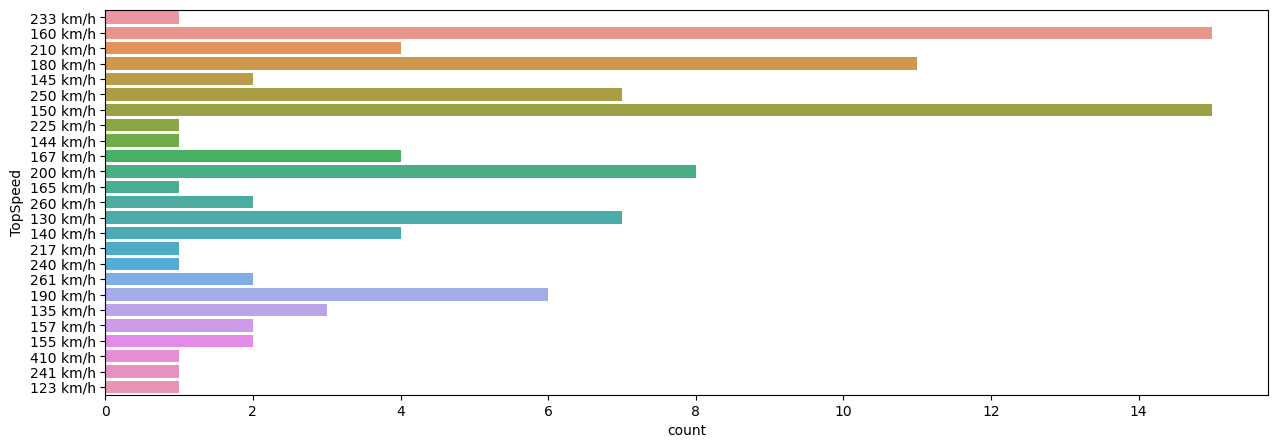

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(y='TopSpeed',data=data)
plt.show()

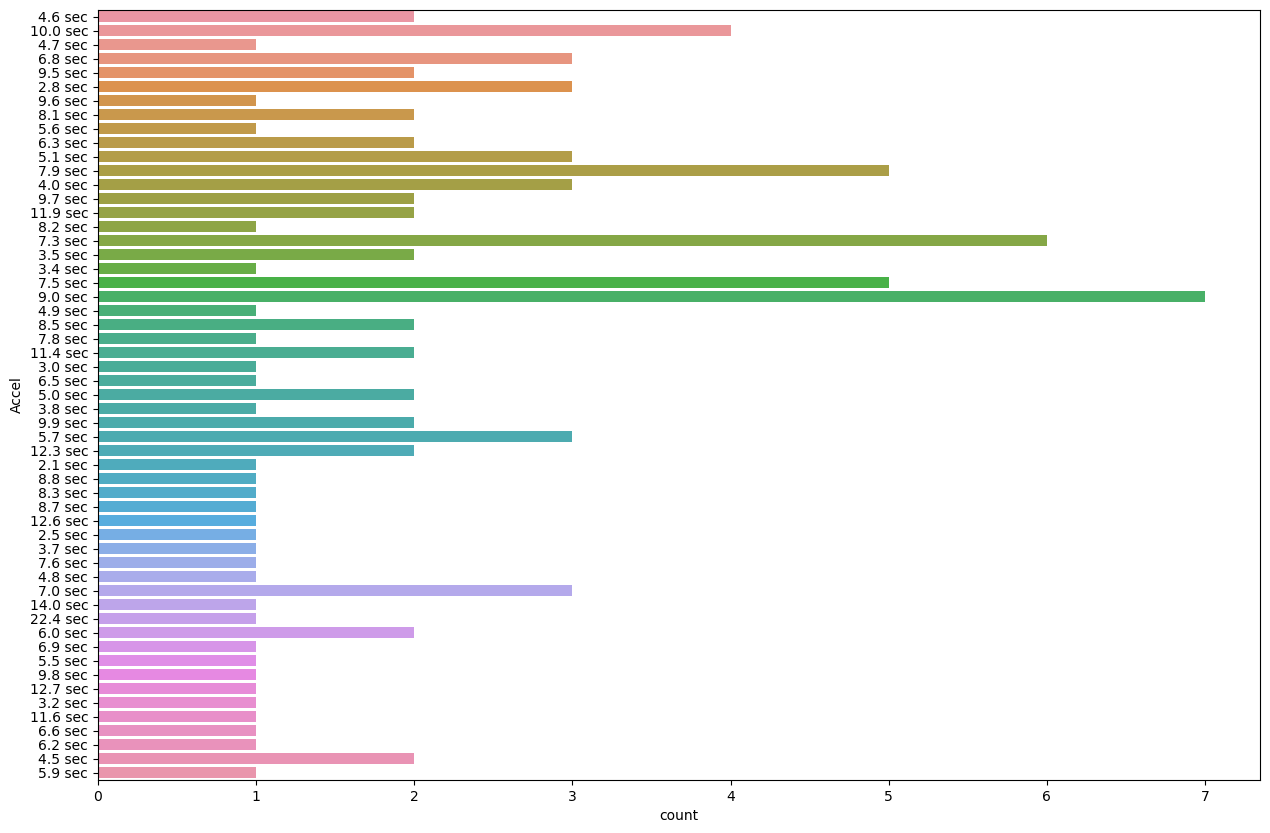

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(y='Accel',data=data)
plt.show()

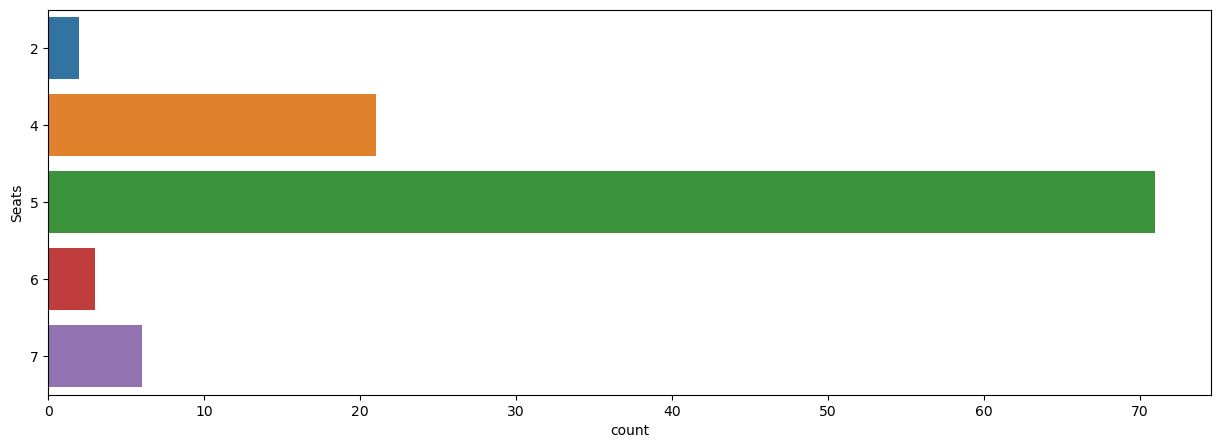

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(y='Seats',data=data)
plt.show()

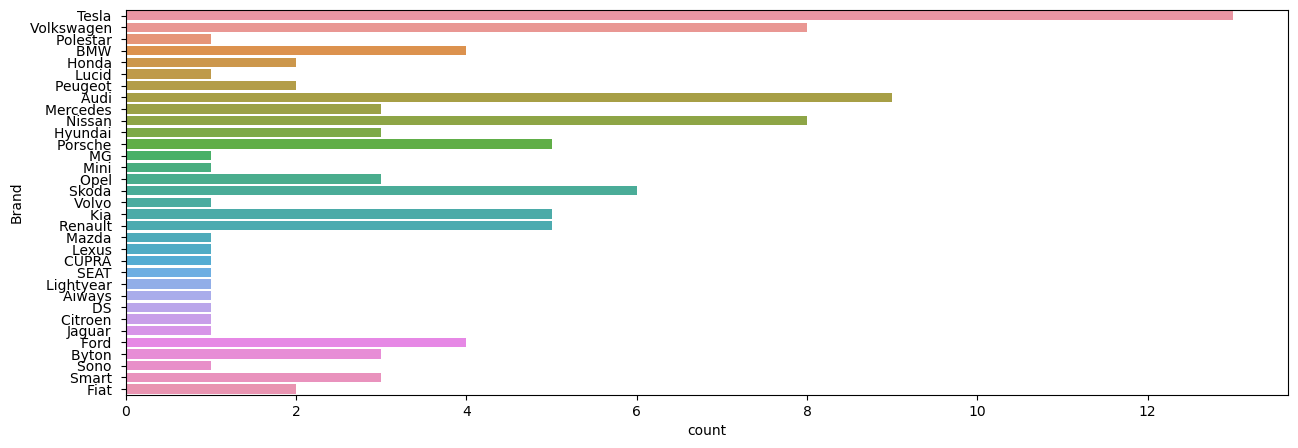

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y='Brand',data=data)
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder


cols = ['Brand', 'Model', 'Accel', 'TopSpeed','Range','Efficiency','FastCharge','RapidCharge','PowerTrain','PlugType','BodyStyle','Segment','Seats','PriceEuro']
#
# Encode labels of multiple columns at once
#
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
data.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,20,18,41,5,50,1,0,2,7,3,2,52
1,31,33,0,9,14,9,7,1,2,2,1,2,2,11
2,23,0,21,15,34,21,36,1,0,2,2,3,2,53
3,2,101,35,12,27,32,32,1,2,2,6,3,2,64
4,9,78,50,5,3,10,2,1,2,2,1,1,1,16


In [13]:
data_price = data.drop('Model',axis=1)
data_price.head()

,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,20,18,41,5,50,1,0,2,7,3,2,52
1,31,0,9,14,9,7,1,2,2,1,2,2,11
2,23,21,15,34,21,36,1,0,2,2,3,2,53
3,2,35,12,27,32,32,1,2,2,6,3,2,64
4,9,50,5,3,10,2,1,2,2,1,1,1,16


In [14]:
features = list(data_price.columns)
d = data_price[features] 
features

['Brand',
 'Accel',
 'TopSpeed',
 'Range',
 'Efficiency',
 'FastCharge',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Segment',
 'Seats',
 'PriceEuro']

In [15]:
#Clustering According to the price of the vehicle owned

from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=2)
d['clusters'] = clustering_kmeans.fit_predict(d)     
d

C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\apara\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Brand,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,clusters
0,30,20,18,41,5,50,1,0,2,7,3,2,52,0
1,31,0,9,14,9,7,1,2,2,1,2,2,11,1
2,23,21,15,34,21,36,1,0,2,2,3,2,53,0
3,2,35,12,27,32,32,1,2,2,6,3,2,64,0
4,9,50,5,3,10,2,1,2,2,1,1,1,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,20,39,9,23,25,21,1,1,2,1,2,2,43,0
99,1,19,15,24,49,30,1,0,2,6,4,2,75,0
100,20,29,14,22,27,21,1,0,2,1,2,2,47,0
101,20,25,14,30,44,22,1,0,2,1,2,2,61,0


Text(0, 0.5, 'PriceEuro')

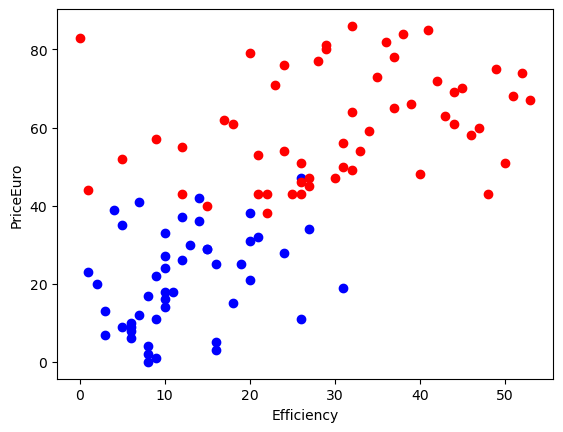

In [16]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Efficiency, d1['PriceEuro'],color='blue')
plt.scatter(d0.Efficiency, d0['PriceEuro'],color='red')
plt.xlabel('Efficiency')
plt.ylabel('PriceEuro')

Text(0, 0.5, 'Accel')

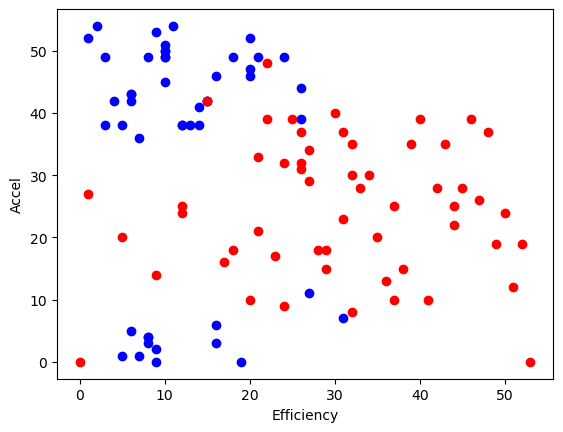

In [17]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Efficiency, d1['Accel'],color='blue')
plt.scatter(d0.Efficiency, d0['Accel'],color='red')
plt.xlabel('Efficiency')
plt.ylabel('Accel')

Text(0, 0.5, 'TopSpeed')

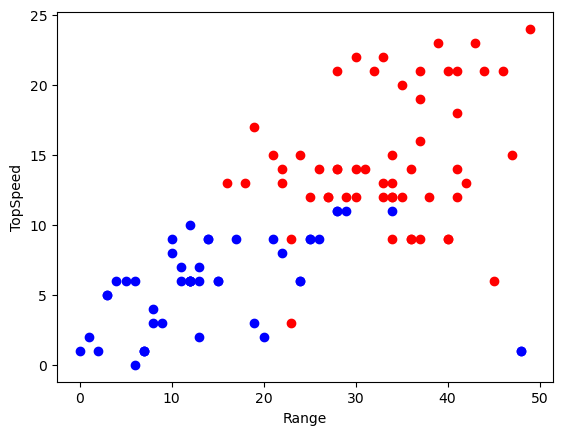

In [18]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Range, d1['TopSpeed'],color='blue')
plt.scatter(d0.Range, d0['TopSpeed'],color='red')
plt.xlabel('Range')
plt.ylabel('TopSpeed')

Text(0, 0.5, 'PriceEuro')

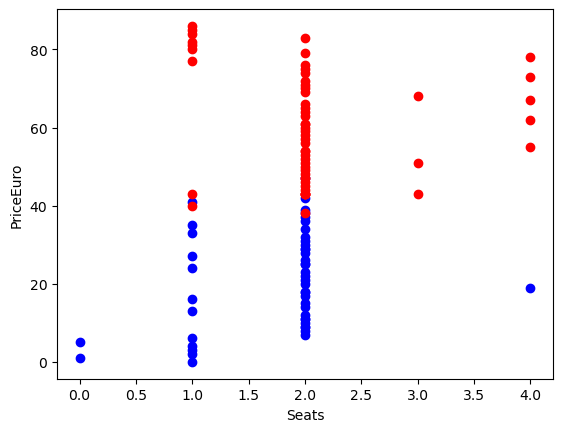

In [19]:
d1 = d[d.clusters==1]
d0 = d[d.clusters==0]
plt.scatter(d1.Seats, d1['PriceEuro'],color='blue')
plt.scatter(d0.Seats, d0['PriceEuro'],color='red')
plt.xlabel('Seats')
plt.ylabel('PriceEuro')

C:\Users\apara\AppData\Local\Temp\ipykernel_15176\3229007800.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\Temp\ipykernel_15176\3229007800.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\T

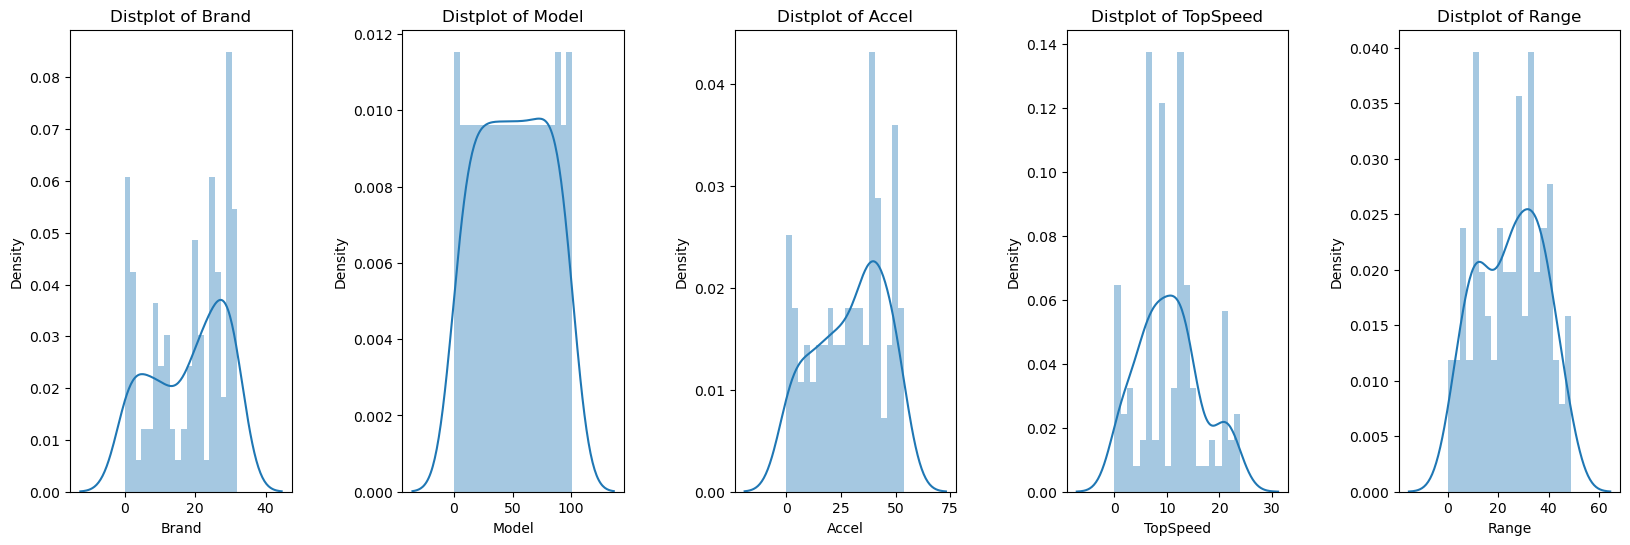

In [40]:
plt.figure(1, figsize=(20,6))
n=0
for x in ['Brand', 'Model', 'Accel', 'TopSpeed','Range']:
  n += 1
  plt.subplot(1,5,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(data[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

C:\Users\apara\AppData\Local\Temp\ipykernel_15176\714454003.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\Temp\ipykernel_15176\714454003.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\Tem

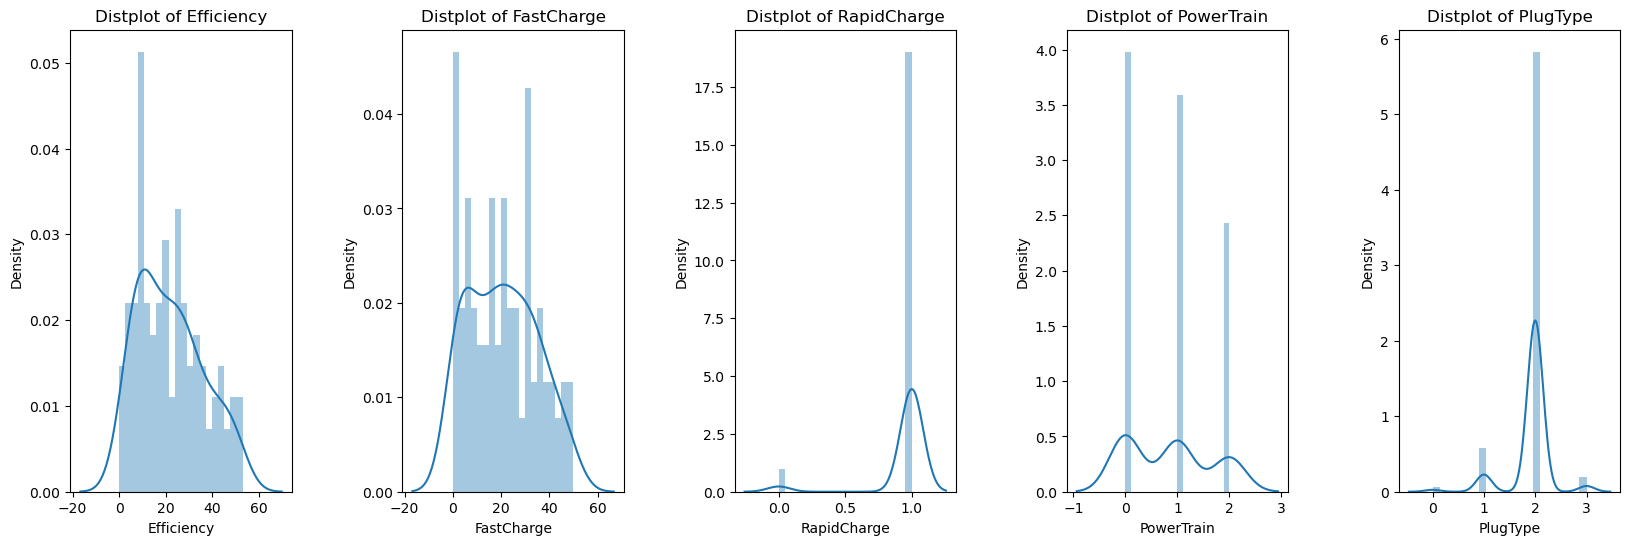

In [41]:
plt.figure(1, figsize=(20,6))
n=0
for x in ['Efficiency','FastCharge','RapidCharge','PowerTrain','PlugType']:
  n += 1
  plt.subplot(1,5,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(data[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()

C:\Users\apara\AppData\Local\Temp\ipykernel_15176\516102100.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\Temp\ipykernel_15176\516102100.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[x], bins = 20)
C:\Users\apara\AppData\Local\Tem

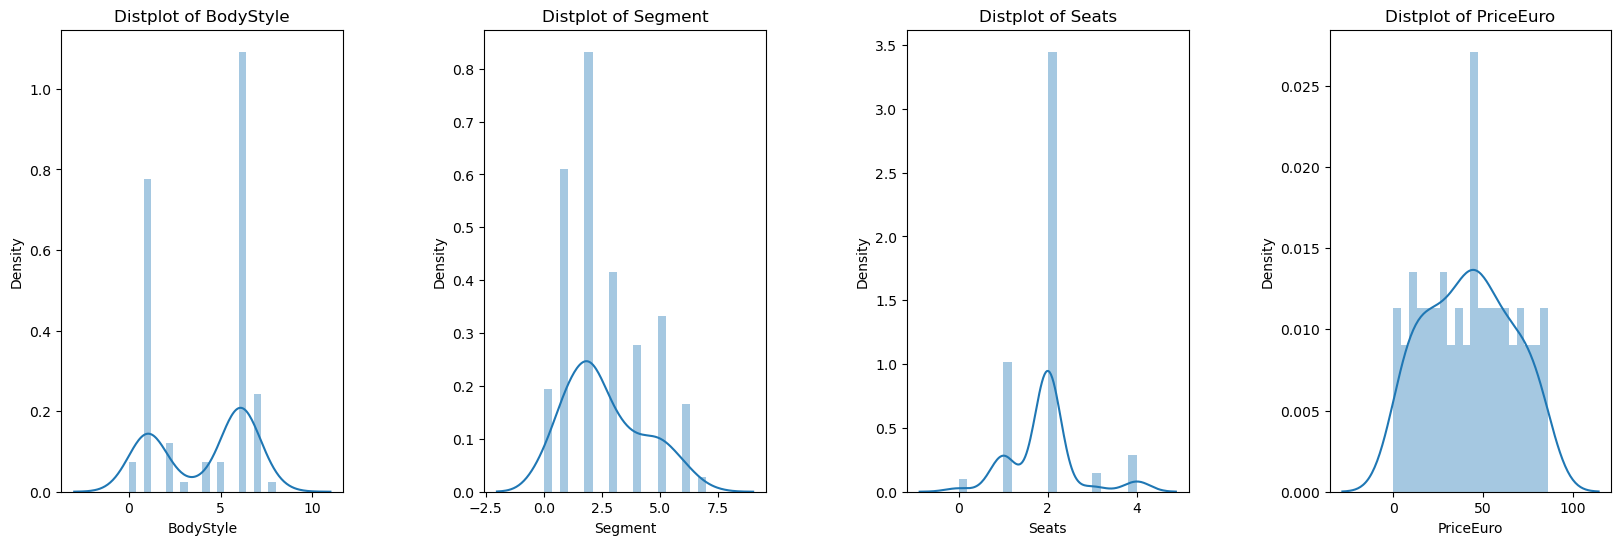

In [42]:
plt.figure(1, figsize=(20,6))
n=0
for x in ['BodyStyle','Segment','Seats','PriceEuro']:
  n += 1
  plt.subplot(1,4,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(data[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show()